In [2]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
try:
    conn = sql.connect('C:\\Users\\Alexander\\Desktop\\Alexan\\Coding\\Data and ML\\datasets\\Movie Data Analytics Dataset\\movie.sqlite')
except:
    conn = sql.connect('D:\\Random\\Для PC\\Data and ML\\datasets\\Movie Data Analytics Dataset\\movie.sqlite')

In [4]:
tables = pd.read_sql("SELECT * FROM sqlite_master WHERE type = 'table';", conn)
tables

type     name tbl_name  rootpage  \
0  table     IMDB     IMDB         2   
1  table  earning  earning        43   
2  table    genre    genre        45   

                                                 sql  
0  CREATE TABLE IMDB (Movie_id Text, Title Text, ...  
1  CREATE TABLE earning (Movie_id Text, Domestic ...  
2     CREATE TABLE genre (Movie_id Text, genre Text)

In [5]:
genres = pd.read_sql("SELECT * FROM 'genre';", conn)
genres

Movie_id      genre
0      36809  Biography
1      30114  Adventure
2      37367     Comedy
3      49473     Comedy
4      14867      Drama
..       ...        ...
346    38262           
347    10023     Comedy
348    27783     Sci-Fi
349    42294     Sci-Fi
350    32217     Comedy

[351 rows x 2 columns]

In [6]:
#заменим пустые значения NaN
genres['genre'][genres['genre'] == ''] = np.nan
genres

Movie_id      genre
0      36809  Biography
1      30114  Adventure
2      37367     Comedy
3      49473     Comedy
4      14867      Drama
..       ...        ...
346    38262        NaN
347    10023     Comedy
348    27783     Sci-Fi
349    42294     Sci-Fi
350    32217     Comedy

[351 rows x 2 columns]

In [7]:
#не хватает данных по жанрам фильмов
genres[genres.isna().any(axis = 1) == True].count()

Movie_id    41
genre        0
dtype: int64

In [8]:
earnings = pd.read_sql("SELECT * FROM 'earning';", conn)
earnings

Movie_id   Domestic     Worldwide
0      36809   56671993  1.877332e+08
1      30114   18335230  6.073880e+07
2      37367   35014192  3.918778e+07
3      49473   15322921  8.710045e+07
4      14867    6739492  1.983949e+07
..       ...        ...           ...
112    38262   13092000  4.898204e+07
113    10023  189422889  4.712229e+08
114    27783  233921534  7.478628e+08
115    42294  146408305  3.536241e+08
116    32217  341268248  1.023784e+09

[117 rows x 3 columns]

In [9]:
imdb = pd.read_sql("SELECT * FROM 'IMDB';", conn)
imdb

Movie_id                              Title  Rating  TotalVotes  \
0      36809            12 Years a Slave (2013)     8.1      496092   
1      30114                   127 Hours (2010)     7.6      297075   
2      37367                       50/50 (2011)     7.7      283935   
3      49473                  About Time (2013)     7.8      225412   
4      14867                       Amour (2012)     7.9       76121   
..       ...                                ...     ...         ...   
112    38262                    Whiplash (2014)     8.5      492285   
113    10023              Wreck-It Ralph (2012)     7.7      295125   
114    27783  X-Men: Days of Future Past (2014)     8.0      560736   
115    42294          X-Men: First Class (2011)     7.8      556713   
116    32217                    Zootopia (2016)     8.1      309474   

    MetaCritic       Budget  Runtime CVotes10 CVotes09 CVotes08  ...  \
0           96   20000000.0  134 min    75556   126223   161460  ...   
1           82   18000000.0   94 min    28939    44110    98845  ...   
2           72    8000000.0  100 min    28304    47501    99524  ...   
3                12000000.0  123 min    38556    43170    70850  ...   
4           94    8900000.0  127 min    11093    15944    22942  ...   
..         ...          ...      ...      ...      ...      ...  ...   
112         88    3300000.0  107 min   110404   161864   132656  ...   
113         72  165000000.0             41980    50262    96477  ...   
114         74  200000000.0  132 min    91765   127521   183578  ...   
115         65  160000000.0  132 min    64428    96219   200144  ...   
116         78  150000000.0  108 min    53626    70912   102352  ...   

    Votes3044 Votes3044M Votes3044F Votes45A Votes45AM Votes45AF VotesIMDB  \
0         8.0        7.9        8.0      7.8       7.8       8.1       8.0   
1         7.5        7.5        7.5      7.3       7.3       7.5       7.6   
2         7.6        7.6        7.6      7.4       7.4       7.5       7.4   
3         7.6        7.6        7.7      7.6       7.5       7.8       7.7   
4         7.7        7.7        7.9      7.9       7.8       8.1       6.6   
..        ...        ...        ...      ...       ...       ...       ...   
112       8.3        8.3        8.2      8.1       8.1       8.2       8.7   
113       7.6        7.6        7.7      7.4       7.4       7.5       7.4   
114       7.8        7.8        8.0      7.7       7.7       7.9       7.5   
115       7.7        7.6        7.8      7.6       7.5       7.7       7.6   
116       7.8        7.8        8.1      7.8       7.8       8.1       7.7   

    Votes1000 VotesUS VotesnUS  
0         7.7     8.3      8.0  
1         7.0     7.7      7.6  
2         7.0     7.9      7.6  
3         6.9     7.8      7.7  
4         7.2     7.9      7.8  
..        ...     ...      ...  
112       8.0     8.6      8.4  
113       7.2     7.9      7.6  
114       7.4     8.1      7.9  
115       7.3     7.8      7.7  
116       7.6     8.0      8.0  

[117 rows x 52 columns]

In [10]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie_id      117 non-null    object 
 1   Title         117 non-null    object 
 2   Rating        117 non-null    float64
 3   TotalVotes    117 non-null    int64  
 4   MetaCritic    117 non-null    object 
 5   Budget        117 non-null    object 
 6   Runtime       117 non-null    object 
 7   CVotes10      117 non-null    object 
 8   CVotes09      117 non-null    object 
 9   CVotes08      117 non-null    object 
 10  CVotes07      117 non-null    object 
 11  CVotes06      117 non-null    object 
 12  CVotes05      117 non-null    object 
 13  CVotes04      117 non-null    object 
 14  CVotes03      117 non-null    object 
 15  CVotes02      117 non-null    object 
 16  CVotes01      117 non-null    object 
 17  CVotesMale    117 non-null    object 
 18  CVotesFemale  117 non-null    

In [11]:
#идеи: корреляция между доходами фильма и оценками разных возрастов
#корреляция между бюджетом и рейтингом
#любимый жанр каждой возрастной группы

#### Топ-3 жанров с самым высоким доходом за всё время, используя SQL

In [12]:
earnings_genres = pd.read_sql("""SELECT genre, SUM(Worldwide) 
                                FROM earning LEFT JOIN genre 
                                ON earning.Movie_id = genre.Movie_id
                                GROUP BY genre
                                ORDER BY SUM(Worldwide) DESC
                                LIMIT 3""", conn)
earnings_genres

genre  SUM(Worldwide)
0  Adventure    2.662983e+10
1     Action    1.986750e+10
2      Drama    1.301904e+10

### Топ самых доходных в мире годов кинематографа c 2010 года

Выделим из столца Title таблицы IMDB год, затем присоединим таблицу Earnings к таблице IMDB.
Просуммируем данные общемировых сборов группируя по годам.

In [13]:
#некоторые названия фильмов в таблице IMDB содержат non-breaking space chr(160) - \xa0
imdb['Title'][2]

'50/50\xa0(2011)'

In [14]:
#заменим на обычные пробелы Chr(32)
imdb['Title'] = imdb['Title'].str.replace(u'\xa0', u' ')
imdb['Title'][2]

'50/50 (2011)'

In [15]:
#применим регулярное выражение для разбиения столбца с названием и годом на два отдельных столбца
temp = imdb['Title'].str.split(r'(.+) \((\d{4})\)', expand = True)


In [16]:
imdb['Title'], imdb['Year'] = temp.iloc[:, 1], temp.iloc[:, 2]
imdb

Movie_id                       Title  Rating  TotalVotes MetaCritic  \
0      36809            12 Years a Slave     8.1      496092         96   
1      30114                   127 Hours     7.6      297075         82   
2      37367                       50/50     7.7      283935         72   
3      49473                  About Time     7.8      225412              
4      14867                       Amour     7.9       76121         94   
..       ...                         ...     ...         ...        ...   
112    38262                    Whiplash     8.5      492285         88   
113    10023              Wreck-It Ralph     7.7      295125         72   
114    27783  X-Men: Days of Future Past     8.0      560736         74   
115    42294          X-Men: First Class     7.8      556713         65   
116    32217                    Zootopia     8.1      309474         78   

          Budget  Runtime CVotes10 CVotes09 CVotes08  ... Votes3044M  \
0     20000000.0  134 min    75556   126223   161460  ...        7.9   
1     18000000.0   94 min    28939    44110    98845  ...        7.5   
2      8000000.0  100 min    28304    47501    99524  ...        7.6   
3     12000000.0  123 min    38556    43170    70850  ...        7.6   
4      8900000.0  127 min    11093    15944    22942  ...        7.7   
..           ...      ...      ...      ...      ...  ...        ...   
112    3300000.0  107 min   110404   161864   132656  ...        8.3   
113  165000000.0             41980    50262    96477  ...        7.6   
114  200000000.0  132 min    91765   127521   183578  ...        7.8   
115  160000000.0  132 min    64428    96219   200144  ...        7.6   
116  150000000.0  108 min    53626    70912   102352  ...        7.8   

    Votes3044F Votes45A Votes45AM Votes45AF VotesIMDB Votes1000 VotesUS  \
0          8.0      7.8       7.8       8.1       8.0       7.7     8.3   
1          7.5      7.3       7.3       7.5       7.6       7.0     7.7   
2          7.6      7.4       7.4       7.5       7.4       7.0     7.9   
3          7.7      7.6       7.5       7.8       7.7       6.9     7.8   
4          7.9      7.9       7.8       8.1       6.6       7.2     7.9   
..         ...      ...       ...       ...       ...       ...     ...   
112        8.2      8.1       8.1       8.2       8.7       8.0     8.6   
113        7.7      7.4       7.4       7.5       7.4       7.2     7.9   
114        8.0      7.7       7.7       7.9       7.5       7.4     8.1   
115        7.8      7.6       7.5       7.7       7.6       7.3     7.8   
116        8.1      7.8       7.8       8.1       7.7       7.6     8.0   

    VotesnUS  Year  
0        8.0  2013  
1        7.6  2010  
2        7.6  2011  
3        7.7  2013  
4        7.8  2012  
..       ...   ...  
112      8.4  2014  
113      7.6  2012  
114      7.9  2014  
115      7.7  2011  
116      8.0  2016  

[117 rows x 53 columns]

In [17]:
imdb_earnings = imdb.merge(earnings, how = 'inner', left_on = ['Movie_id'], right_on = ['Movie_id'])

In [18]:
imdb_earnings.groupby('Year').sum('Worldwide').sort_values('Worldwide', ascending = False)

Rating  TotalVotes    Domestic     Worldwide
Year                                              
2014   181.8     9775100  2817492637  7.861075e+09
2016   142.6     3964087  2803281865  6.747637e+09
2012   110.4     7172047  2560452585  6.711606e+09
2010   141.3     8466318  2597821115  6.492498e+09
2015   102.6     4305653  2372413474  5.421792e+09
2013   141.5     6279963  1833795893  4.585894e+09
2011   101.0     3979584   930178127  2.003725e+09

In [19]:
px.bar(imdb_earnings.groupby('Year').sum('Worldwide').reset_index(),
      x = 'Year',
      y = 'Worldwide',
      labels = {'Worldwide': 'Worldwide revenue'},
      title = 'Worldwide revenue vs. Year')


### Поиск корреляций

In [20]:
#каждому Movie_ID может соответствует 3 жанра, если их меньше 3ёх, то появляются пустые значения, которые нужно удалить
genres = genres.dropna()

In [21]:
genres_grouped = genres.groupby('Movie_id')['genre'].apply(list)

In [22]:
#Объединим все SQL таблицы в одну с помощью pd.merge
all_tables = imdb_earnings.merge(genres_grouped, how = 'left', left_on = ['Movie_id'], right_on = ['Movie_id'])

In [23]:
#в полученной таблице большое количество столбцов с нечисловыми типами
all_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie_id      117 non-null    object 
 1   Title         117 non-null    object 
 2   Rating        117 non-null    float64
 3   TotalVotes    117 non-null    int64  
 4   MetaCritic    117 non-null    object 
 5   Budget        117 non-null    object 
 6   Runtime       117 non-null    object 
 7   CVotes10      117 non-null    object 
 8   CVotes09      117 non-null    object 
 9   CVotes08      117 non-null    object 
 10  CVotes07      117 non-null    object 
 11  CVotes06      117 non-null    object 
 12  CVotes05      117 non-null    object 
 13  CVotes04      117 non-null    object 
 14  CVotes03      117 non-null    object 
 15  CVotes02      117 non-null    object 
 16  CVotes01      117 non-null    object 
 17  CVotesMale    117 non-null    object 
 18  CVotesFemale  117 non-null    

In [24]:
all_tables

Movie_id                       Title  Rating  TotalVotes MetaCritic  \
0      36809            12 Years a Slave     8.1      496092         96   
1      30114                   127 Hours     7.6      297075         82   
2      37367                       50/50     7.7      283935         72   
3      49473                  About Time     7.8      225412              
4      14867                       Amour     7.9       76121         94   
..       ...                         ...     ...         ...        ...   
112    38262                    Whiplash     8.5      492285         88   
113    10023              Wreck-It Ralph     7.7      295125         72   
114    27783  X-Men: Days of Future Past     8.0      560736         74   
115    42294          X-Men: First Class     7.8      556713         65   
116    32217                    Zootopia     8.1      309474         78   

          Budget  Runtime CVotes10 CVotes09 CVotes08  ... Votes45AM Votes45AF  \
0     20000000.0  134 min    75556   126223   161460  ...       7.8       8.1   
1     18000000.0   94 min    28939    44110    98845  ...       7.3       7.5   
2      8000000.0  100 min    28304    47501    99524  ...       7.4       7.5   
3     12000000.0  123 min    38556    43170    70850  ...       7.5       7.8   
4      8900000.0  127 min    11093    15944    22942  ...       7.8       8.1   
..           ...      ...      ...      ...      ...  ...       ...       ...   
112    3300000.0  107 min   110404   161864   132656  ...       8.1       8.2   
113  165000000.0             41980    50262    96477  ...       7.4       7.5   
114  200000000.0  132 min    91765   127521   183578  ...       7.7       7.9   
115  160000000.0  132 min    64428    96219   200144  ...       7.5       7.7   
116  150000000.0  108 min    53626    70912   102352  ...       7.8       8.1   

    VotesIMDB Votes1000 VotesUS VotesnUS  Year   Domestic     Worldwide  \
0         8.0       7.7     8.3      8.0  2013   56671993  1.877332e+08   
1         7.6       7.0     7.7      7.6  2010   18335230  6.073880e+07   
2         7.4       7.0     7.9      7.6  2011   35014192  3.918778e+07   
3         7.7       6.9     7.8      7.7  2013   15322921  8.710045e+07   
4         6.6       7.2     7.9      7.8  2012    6739492  1.983949e+07   
..        ...       ...     ...      ...   ...        ...           ...   
112       8.7       8.0     8.6      8.4  2014   13092000  4.898204e+07   
113       7.4       7.2     7.9      7.6  2012  189422889  4.712229e+08   
114       7.5       7.4     8.1      7.9  2014  233921534  7.478628e+08   
115       7.6       7.3     7.8      7.7  2011  146408305  3.536241e+08   
116       7.7       7.6     8.0      8.0  2016  341268248  1.023784e+09   

                              genre  
0       [Biography, Drama, History]  
1     [Adventure, Biography, Drama]  
2          [Comedy, Drama, Romance]  
3          [Comedy, Drama, Fantasy]  
4                  [Drama, Romance]  
..                              ...  
112                  [Drama, Music]  
113  [Animation, Adventure, Comedy]  
114     [Action, Adventure, Sci-Fi]  
115     [Action, Adventure, Sci-Fi]  
116  [Animation, Adventure, Comedy]  

[117 rows x 56 columns]

In [25]:
#уберём стобцы с названиями и ID, так как они не пригодятся при поиске зависимостей
numeric_tables = all_tables.drop(['Movie_id', 'Title'], axis = 1)

In [26]:
#переведём данные в числовые, игонорируя ошибки в случае перевода. в дальнейшем с ними будем разбираться
numeric_tables = numeric_tables.apply(pd.to_numeric, errors = 'ignore')

In [27]:
#есть 2 столбца с несостоявшимся переводом данных - Runtime и genre
numeric_tables.select_dtypes(exclude = [np.number])

Runtime                           genre
0    134 min     [Biography, Drama, History]
1     94 min   [Adventure, Biography, Drama]
2    100 min        [Comedy, Drama, Romance]
3    123 min        [Comedy, Drama, Fantasy]
4    127 min                [Drama, Romance]
..       ...                             ...
112  107 min                  [Drama, Music]
113           [Animation, Adventure, Comedy]
114  132 min     [Action, Adventure, Sci-Fi]
115  132 min     [Action, Adventure, Sci-Fi]
116  108 min  [Animation, Adventure, Comedy]

[117 rows x 2 columns]

In [28]:
#т.к. pd.get_dummies() по умолчанию не поддерживает списки признаков при бинаризации, 
#воспользуемся MultiLabelBinarizer из библиотеки sklearn
mlb = MultiLabelBinarizer()
dummy = pd.DataFrame(mlb.fit_transform(numeric_tables['genre']), columns=mlb.classes_)

In [29]:
dummy

Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0         0          0          0          1       0      0      1       0   
1         0          1          0          1       0      0      1       0   
2         0          0          0          0       1      0      1       0   
3         0          0          0          0       1      0      1       0   
4         0          0          0          0       0      0      1       0   
..      ...        ...        ...        ...     ...    ...    ...     ...   
112       0          0          0          0       0      0      1       0   
113       0          1          1          0       1      0      0       0   
114       1          1          0          0       0      0      0       0   
115       1          1          0          0       0      0      0       0   
116       0          1          1          0       1      0      0       0   

     Fantasy  History  Horror  Music  Musical  Mystery  Romance  Sci-Fi  \
0          0        1       0      0        0        0        0       0   
1          0        0       0      0        0        0        0       0   
2          0        0       0      0        0        0        1       0   
3          1        0       0      0        0        0        0       0   
4          0        0       0      0        0        0        1       0   
..       ...      ...     ...    ...      ...      ...      ...     ...   
112        0        0       0      1        0        0        0       0   
113        0        0       0      0        0        0        0       0   
114        0        0       0      0        0        0        0       1   
115        0        0       0      0        0        0        0       1   
116        0        0       0      0        0        0        0       0   

     Sport  Thriller  War  Western  
0        0         0    0        0  
1        0         0    0        0  
2        0         0    0        0  
3        0         0    0        0  
4        0         0    0        0  
..     ...       ...  ...      ...  
112      0         0    0        0  
113      0         0    0        0  
114      0         0    0        0  
115      0         0    0        0  
116      0         0    0        0  

[117 rows x 20 columns]

In [30]:
numeric_tables = numeric_tables.drop('genre', axis = 1)

In [31]:
numeric_tables = numeric_tables.join(dummy)

In [32]:
#замени отсутствующие значения на NaN
numeric_tables.loc[numeric_tables['Runtime'] == '','Runtime'] = np.nan

In [33]:
#уберём min в столбце Runtime
numeric_tables['Runtime'] = numeric_tables['Runtime'].str.extract('(\d+)').apply(pd.to_numeric)

In [34]:
#полученная таблица является полностью числовой
numeric_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 73 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        117 non-null    float64
 1   TotalVotes    117 non-null    int64  
 2   MetaCritic    110 non-null    float64
 3   Budget        114 non-null    float64
 4   Runtime       96 non-null     float64
 5   CVotes10      117 non-null    int64  
 6   CVotes09      117 non-null    int64  
 7   CVotes08      117 non-null    int64  
 8   CVotes07      117 non-null    int64  
 9   CVotes06      117 non-null    int64  
 10  CVotes05      117 non-null    int64  
 11  CVotes04      117 non-null    int64  
 12  CVotes03      117 non-null    int64  
 13  CVotes02      117 non-null    int64  
 14  CVotes01      117 non-null    int64  
 15  CVotesMale    117 non-null    int64  
 16  CVotesFemale  117 non-null    int64  
 17  CVotesU18     117 non-null    int64  
 18  CVotesU18M    117 non-null    

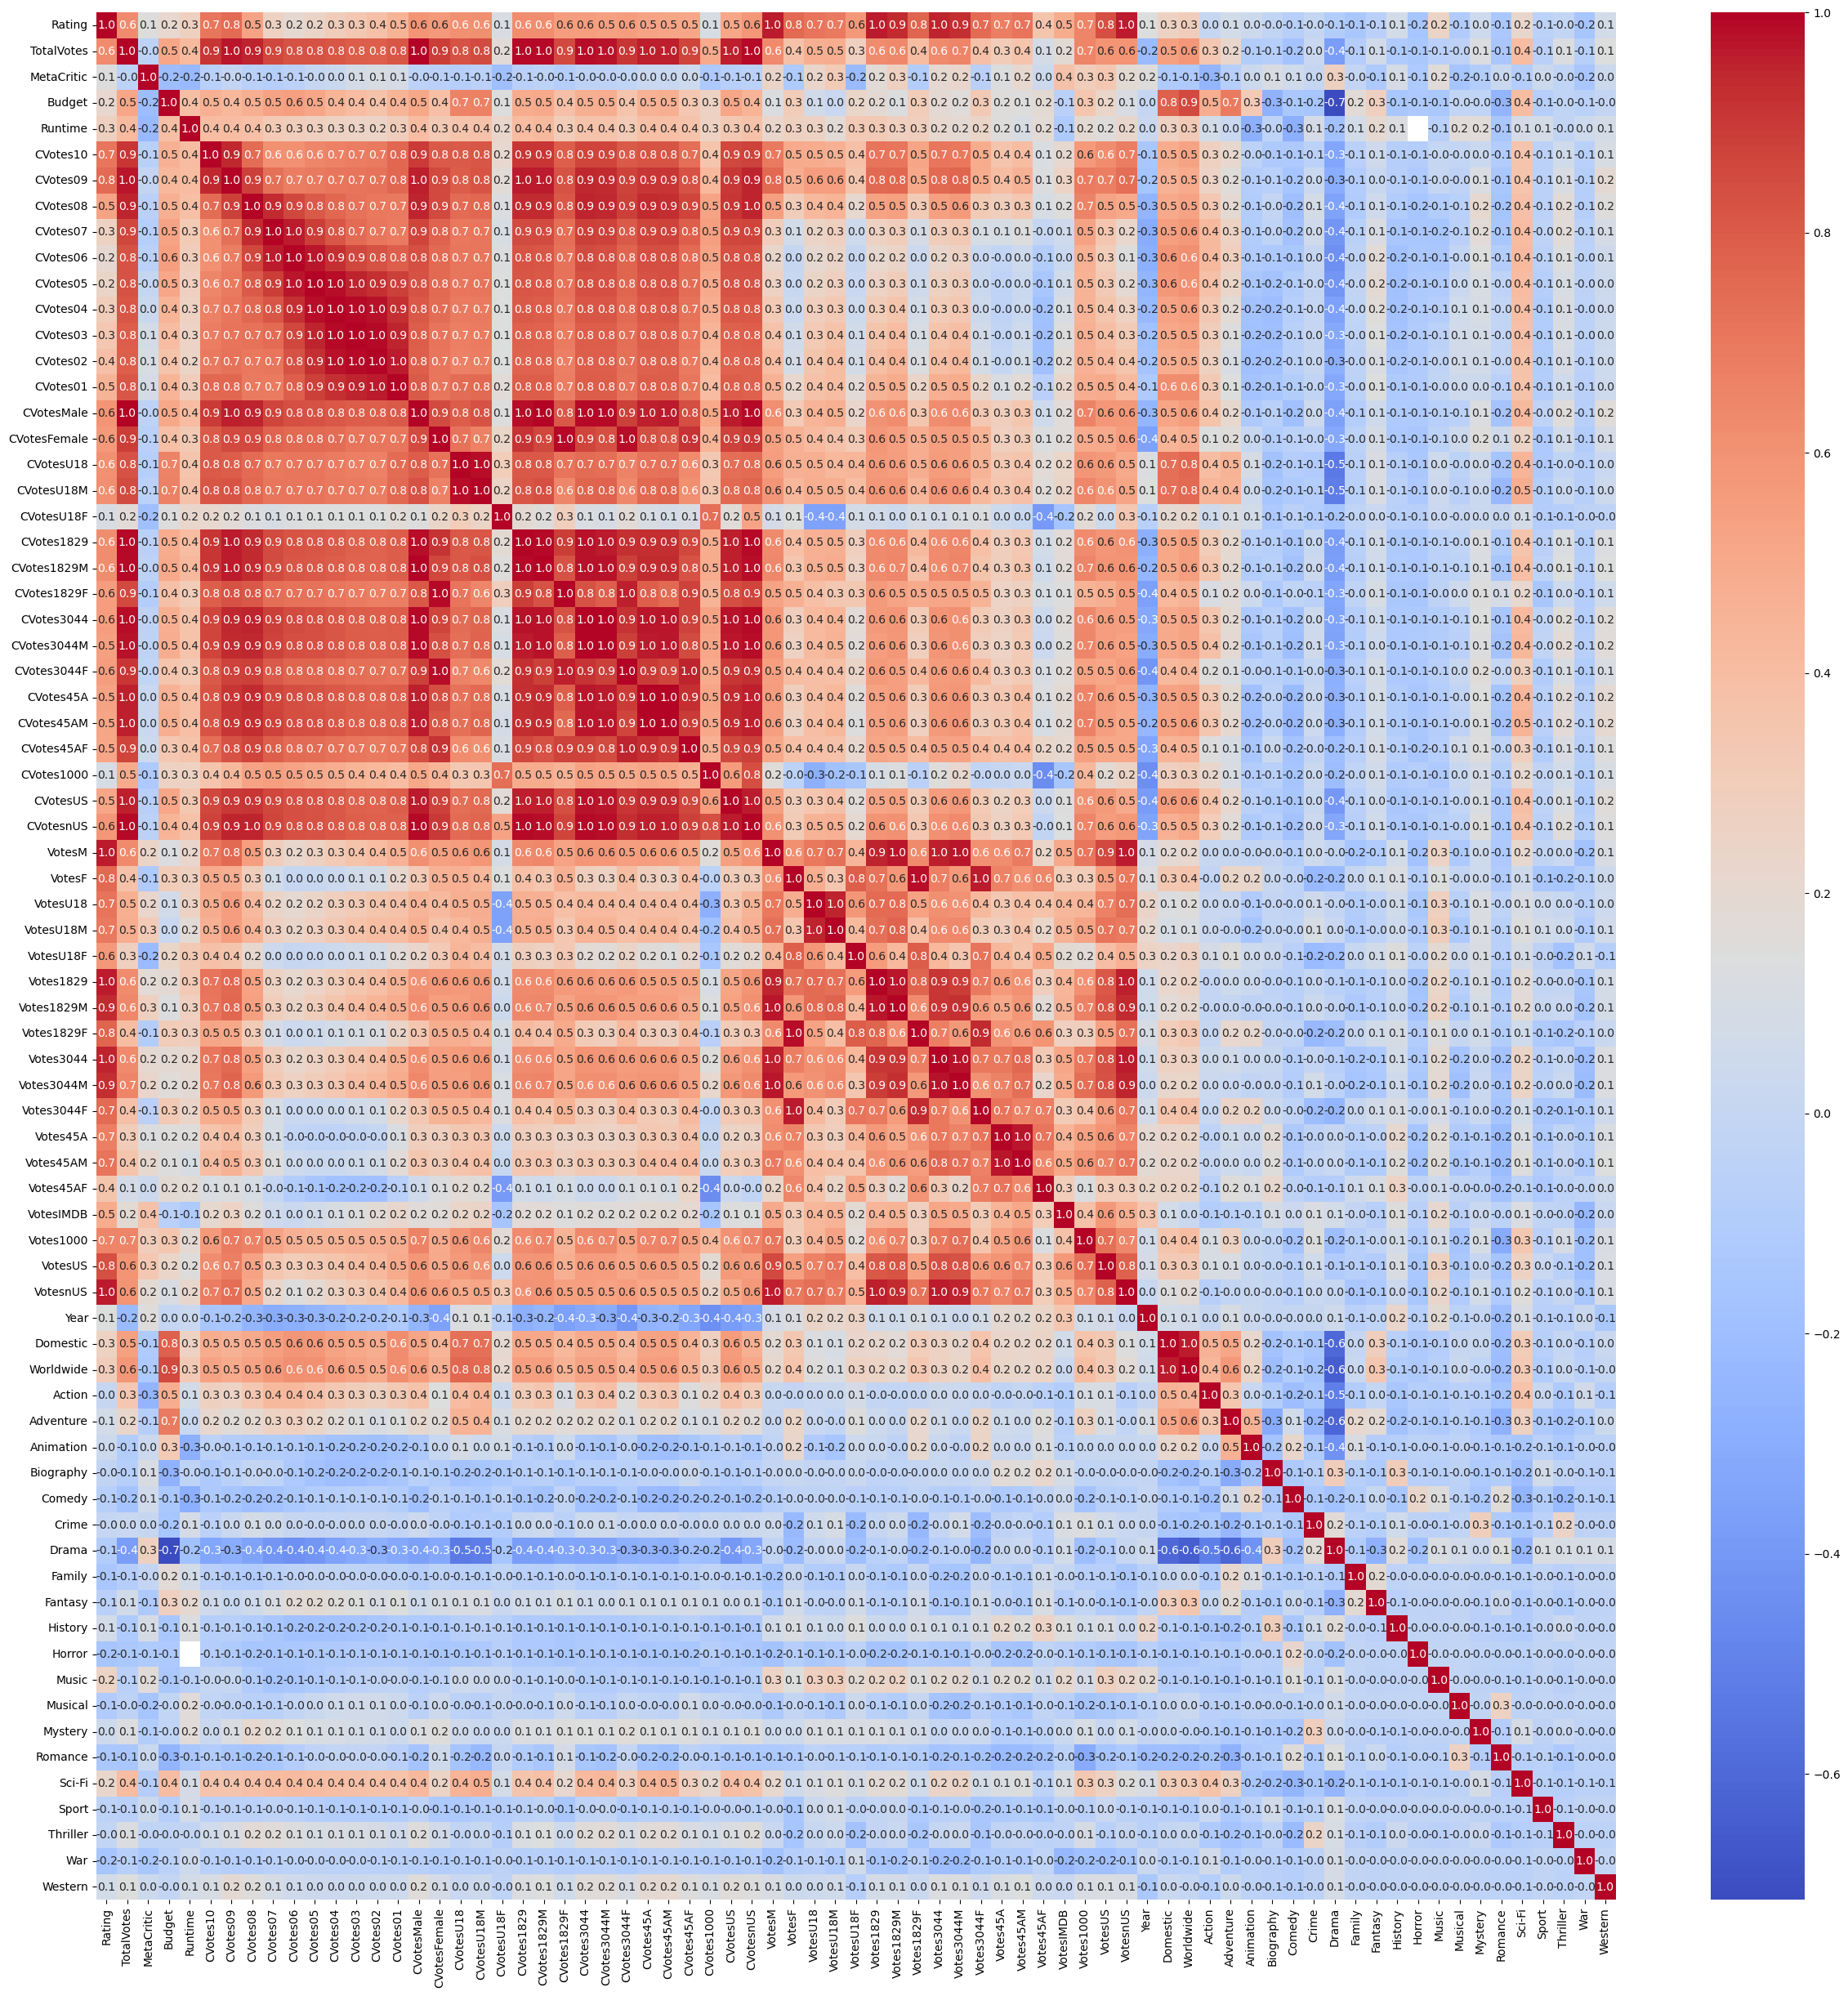

In [35]:
corr_table = numeric_tables.corr()
plt.figure(figsize = (30, 30))
sns.heatmap(corr_table, annot = True, cmap = 'coolwarm', fmt = '.1f')
plt.show()

In [78]:
scat = px.scatter(numeric_tables,
                y = 'Rating', 
                x = 'Budget',
                trendline = 'ols',
                trendline_color_override = 'red',
                 title = 'Rating vs. Budget scatterplot with trend-line')
scat.show()

In [ ]:
#любимый жанр каждой возрастной группы
